In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [5]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url,index_col=0)
wine.head()
wine['taste'] = [1. if i > 5 else 0. for i in wine['quality']]
X = wine.drop(['quality','taste'],axis=1)
y = wine.taste

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
lr = LogisticRegression(solver='liblinear',random_state=13,penalty='l2')
lr.fit(X_train,y_train)

y_pred_tr = lr.predict(X_train)
y_pred_ts = lr.predict(X_test)


In [11]:
print(accuracy_score(y_train,y_pred_tr))
print(accuracy_score(y_test,y_pred_ts))

0.7427361939580527
0.7438461538461538


pipe 라인으로 표준화와 로지스틱회귀 통합

In [16]:
estimators = [
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear',random_state=13,penalty='l2'))
]
pipe = Pipeline(estimators)

In [17]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [19]:
y_pred_tr = pipe.predict(X_train)
y_pred_ts = pipe.predict(X_test)
print(accuracy_score(y_train,y_pred_tr))
print(accuracy_score(y_test,y_pred_ts))

0.7444679622859341
0.7469230769230769


- Decision Tree와의 비교
- 로지스틱 회귀가 성능이 더 높음을 확인할 수 있다.

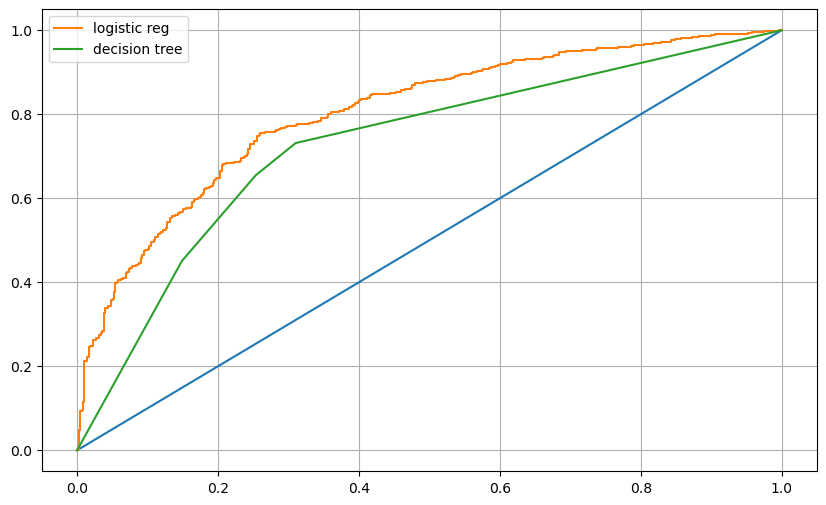

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve

wine_tree = DecisionTreeClassifier(max_depth=2,random_state=13)
wine_tree.fit(X_train,y_train)

models = {'logistic reg':pipe,'decision tree':wine_tree}

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1])
for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,pred)
    plt.plot(fpr,tpr,label=model_name)

plt.grid()
plt.legend()
plt.show();


## 인디언 당뇨병 예측 데이터셋

In [27]:
from IPython.display import Image
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


![image.png](image1.png)

In [38]:
df = df.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


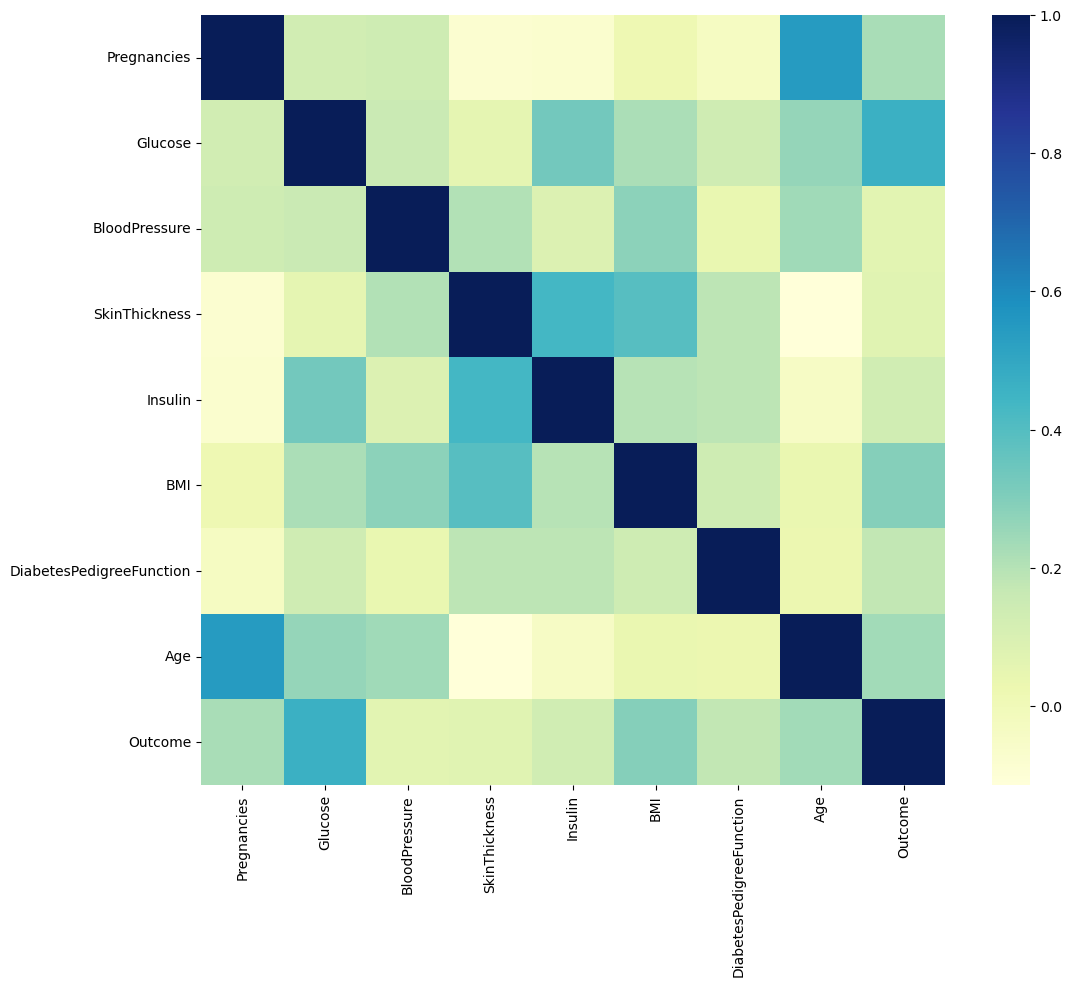

In [39]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,cmap="YlGnBu")
plt.show();
# corr

- 도메인 지식이 없는 상황이므로, 결측치 중 이상치에 관한 데이터는 해당 피쳐의 평균으로 대체한다.

In [42]:
(df==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [43]:
zero_features = ['Glucose','BloodPressure','SkinThickness','BMI']
df[zero_features] = df[zero_features].replace(0,df[zero_features].mean())
(df==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [68]:
from sklearn.metrics import (accuracy_score,roc_auc_score,recall_score,precision_score,f1_score)

estimators = [
    ('Scaler',StandardScaler()),
    ('lr',LogisticRegression(solver='liblinear',penalty='l2'))
]
pipe = Pipeline(estimators)
X = df.drop(['Outcome'],axis=1)
y = df.Outcome

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
pipe.fit(X_train,y_train)

y_pred_tr = pipe.predict(X_train)
y_pred_ts = pipe.predict(X_test)

# print(accuracy_score(y_train, y_pred_tr))
print('accuracy_score : ',accuracy_score(y_test, y_pred_ts))
print('roc_auc_score : ',roc_auc_score(y_test,y_pred_ts))
print('recall_score : ',recall_score(y_test,y_pred_ts))
print('precision_score : ',precision_score(y_test,y_pred_ts))
print('f1_score : ',f1_score(y_test,y_pred_ts))

accuracy_score :  0.7792207792207793
roc_auc_score :  0.7306927111593415
recall_score :  0.543859649122807
precision_score :  0.7948717948717948
f1_score :  0.6458333333333333


- 나이브하게, 계수의 크기는 변수의 중요도를 나타낸다고 볼 수 있다
- 포도당, BMI는 당뇨에 영향을 미치는 정도가 높다.
- 혈압과 인슐린은 예측에 부정적인 영향을 준다.

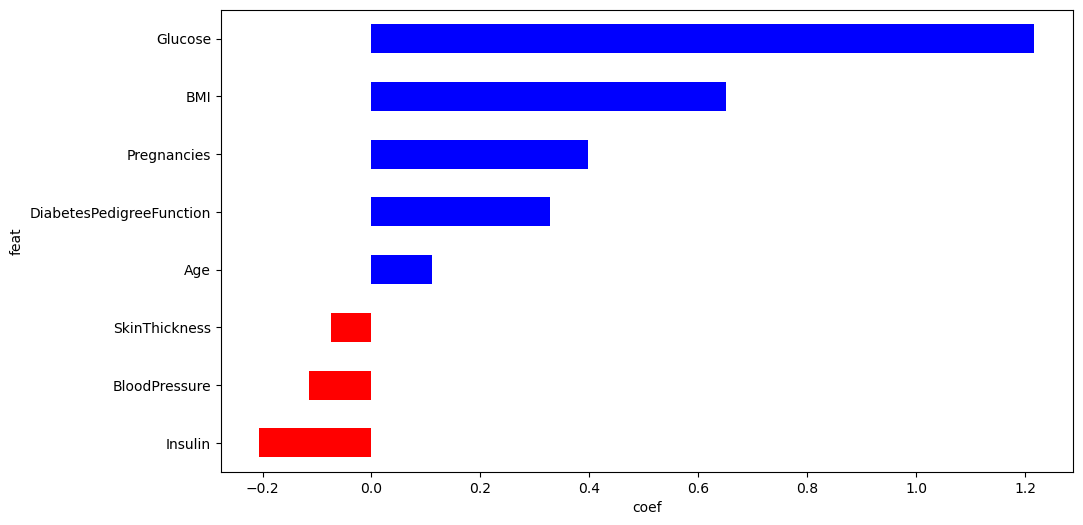

In [71]:
cat = list(X_train.columns)
coef = list(pipe['lr'].coef_[0])
features = pd.DataFrame({'feat':cat,'coef':coef})
features.sort_values(by=['coef'],ascending=True,inplace=True)
features['positive'] = features['coef'] > 0
features.set_index('feat',inplace=True)
features['coef'].plot(kind='barh',figsize=(11,6),color=features['positive'].map({True:'blue',False:'red'}))
plt.xlabel('coef')
plt.show();